# Blackman Window

In this notebook, we analyze the **Blackman window** in both its **symmetric** and **periodic** forms. These window functions are widely used in:
- FIR filter design (symmetric version)
- Spectral analysis via FFT (periodic version)

We'll compare their time-domain shapes and frequency responses using zero-padded FFTs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Window and FFT parameters
M = 64  # Window length (even)
N = 2**int(np.ceil(np.log2(M * 16)))  # FFT length (zero-padded)
dBCut = -100  # dB floor for plotting
eps = np.finfo(float).eps

# Calculate window center
Modd = M % 2
Mo2 = (M - Modd) // 2

## Define Symmetric and Periodic Blackman Windows

The general Blackman window formula is:

$$
w[n] = 0.42 - 0.5 \cos\left(\frac{2\pi n}{L}\right) + 0.08 \cos\left(\frac{4\pi n}{L}\right)
$$

- For **symmetric** version, $L = M - 1$
- For **periodic** version, $L = M$

The periodic version ensures that the start and end match for FFT-based analysis.


In [3]:
# Symmetric Blackman window
n_s = np.arange(M)
wbs = 0.42 - 0.5 * np.cos(2 * np.pi * n_s / (M - 1)) + 0.08 * np.cos(4 * np.pi * n_s / (M - 1))

# Periodic Blackman window (truncate last sample to match length)
n_p = np.arange(M + 1)
wbp_full = 0.42 - 0.5 * np.cos(2 * np.pi * n_p / M) + 0.08 * np.cos(4 * np.pi * n_p / M)
wbp = wbp_full[:-1]


## Zero-Padding and Buffer Centering

To center the window in the FFT frame and improve frequency resolution, we use zero-padding.


In [4]:
# Zero-padded FFT buffers (centered)
wbszp = np.concatenate([wbs[Mo2:], np.zeros(N - M), wbs[:Mo2]])
wbpzp = np.concatenate([wbp[Mo2:], np.zeros(N - M), wbp[:Mo2]])


## Frequency Domain: Compute and Normalize FFT

We compute the FFT of both windows, convert to decibels (dB), normalize the max to 0 dB, and clip below -100 dB for better visualization.


In [5]:
# Compute FFTs
Wbs = np.fft.fft(wbszp)
Wbp = np.fft.fft(wbpzp)

# Convert to dB, normalize and clip
def compute_mag_dB(W, dBCut):
    mag_dB = 20 * np.log10(np.abs(W) + eps)
    mag_dB -= np.max(mag_dB)
    return np.maximum(mag_dB, dBCut)

magWbs_dB = compute_mag_dB(Wbs, dBCut)
magWbp_dB = compute_mag_dB(Wbp, dBCut)


## Plot Time and Frequency Domain

Below we visualize the time-domain shapes and their frequency-domain behavior (in dB).


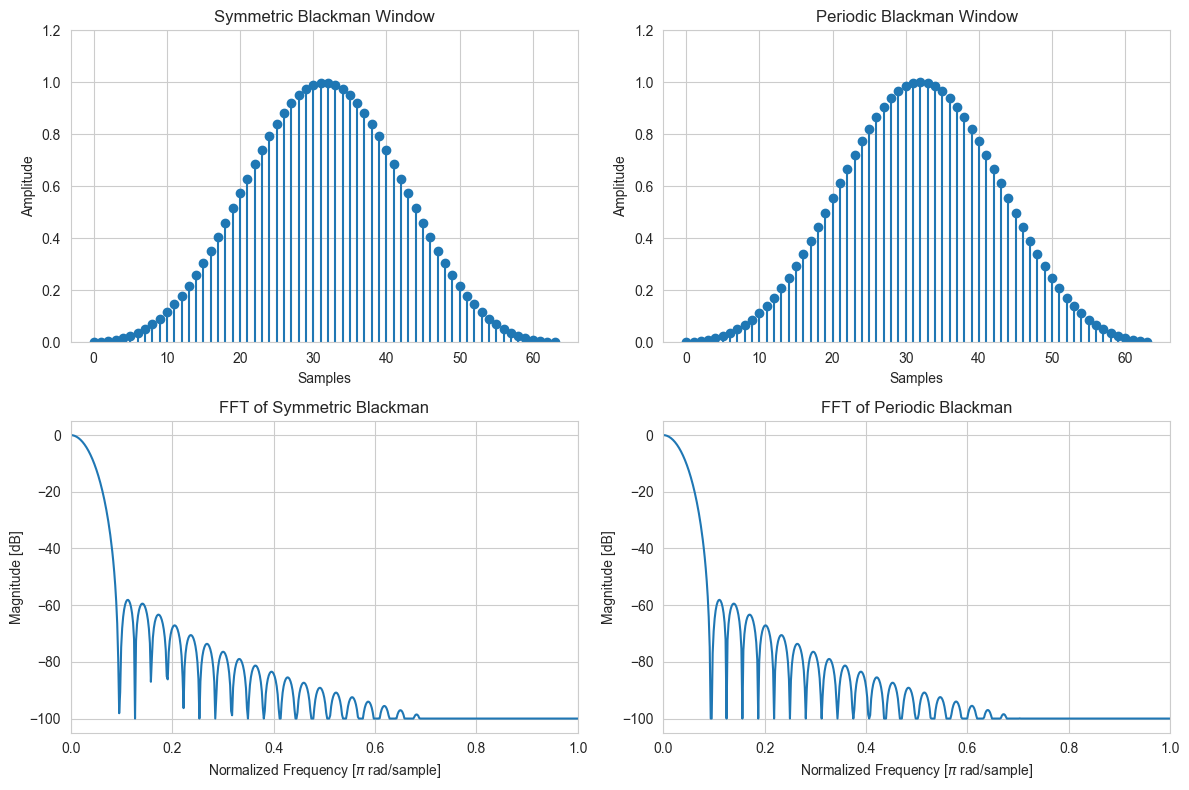

In [6]:
# Time and frequency axes
n = np.arange(M)
nf = np.linspace(0, 2, N, endpoint=False)  # Normalized frequency (0 to 2)

plt.figure(figsize=(12, 8))

# Time domain - symmetric
plt.subplot(2, 2, 1)
plt.stem(n, wbs, basefmt=" ")
plt.title("Symmetric Blackman Window")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.ylim(0, 1.2)

# Time domain - periodic
plt.subplot(2, 2, 2)
plt.stem(n, wbp, basefmt=" ")
plt.title("Periodic Blackman Window")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.ylim(0, 1.2)

# Frequency domain - symmetric
plt.subplot(2, 2, 3)
plt.plot(nf, magWbs_dB)
plt.title("FFT of Symmetric Blackman")
plt.xlabel(r"Normalized Frequency [$\pi$ rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.xlim(0, 1)

# Frequency domain - periodic
plt.subplot(2, 2, 4)
plt.plot(nf, magWbp_dB)
plt.title("FFT of Periodic Blackman")
plt.xlabel(r"Normalized Frequency [$\pi$ rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()
